# 🛒 **연관 분석 (Association Rule Analysis) 실습**

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 이번 시간엔 장바구니 분석이라고도 불리는 연관 분석 실습을 진행해볼게요! <strong>
</span>


- **연관 분석**: 상품이나 서비스를 구매하는 등 일련의 거래나 사건 안에 존재하는 항목 간의 일정한 연관 규칙을 발견하는 분석

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 분석에 앞서 mlxtend 라이브러리 설치가 필요합니다! <strong>
</span>

### <span style="color:purple"> <strong> 🟣 mlxtend 라이브러리 설치 <strong> </span>

- `mlxtend`(machine learning extensions)는 Python에서 머신러닝과 데이터 분석을 더 쉽게 할 수 있도록 도와주는 확장 라이브러리 
- `scikit-learn`과 호환되며, Apriori, Association Rules 같은 기능 제공 ->  **연관 분석 (Association Rule Mining)** 할 때 자주 사용


In [112]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤔 그냥 `scikit - learn` 쓰면 안되나요? <strong>
</span> 

- 사이킷런에서도 인코딩이 가능하긴 하지만 "고정된 열 구조"가 있는 2D 테이블형 데이터에서만 적용 가능 
- 장바구니 분석에서 주로 등장하는 리스트-오브-리스트 형태의 데이터셋에서는 적용하기 어려운 부분이 있음

    ex)   
    [['milk'], ['bread']] => ✅ 가능  
    [['milk', 'bread'], ['bread', 'butter']] => ❌ 불가능 (리스트 안의 길이가 가변)

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 패키지 다운이 완료되었다면 먼저 Apriori 알고리즘을 활용한 연관 분석 실습을 진행해보도록 하겠습니다! <strong>
</span>

## **1️⃣ 실습 ① : Apriori 알고리즘을 활용한 연관 분석 실습**

### 🟡 <span style="color:orange"> <strong> 1. 트랜잭션 데이터를 연관 규칙 분석이 가능한 이진(True/False) 행렬로 변환하기 <strong> </span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 트랜잭션 데이터란 ?!<strong>
</span>

- 한 명의 고객이 한 번의 구매 행위(장바구니)에서 선택한 상품 목록을 기록한 데이터

  → 연관 규칙 분석에서는 이 데이터를 기반으로 어떤 상품들이 함께 자주 구매되는지 파악

예시) 트랜잭션 데이터 → 각 리스트 하나는 하나의 **트랜잭션(장바구니)**</span>에 해당 / 고객이 해당 거래에서 어떤 상품을 샀는지 나열된 구조

dataset = [
    ['Apple', 'Beer', 'Rice'],
    ['Apple', 'Beer'],
    ['Apple', 'Bananas'],
    ['Milk', 'Beer', 'Rice'],
    ['Milk', 'Beer']
]

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 Apriori 알고리즘에 해당 데이터를 입력하기 위해선 데이터를 아래처럼 이진(True/False) 행렬 형식으로 변환하는 과정이 필요합니다!<strong>
</span>

변환 후)
| Apple | Bananas | Beer  | Milk  | Rice  |
| ----- | ------- | ----- | ----- | ----- |
| True  | False   | True  | False | True  |
| True  | False   | True  | False | False |
| True  | True    | False | False | False |
| False | False   | True  | True  | True  |
| False | False   | True  | True  | False |


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤔 왜요?? 그냥 리스트로 입력하면 안되나요????? <strong>
</span>

- 리스트 형태의 트랜잭션은 사람이 보기엔 이해하기 쉽지만, 알고리즘은 **모든 거래를 동일한 기준(전체 상품 목록)**에서 비교해야 함

- 따라서 `TransactionEncoder`를 사용하여 모든 거래를 하나의 기준 열(상품 리스트)로 통일한 이진 매트릭스 형식으로 바꿔야 함

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 그럼 코드를 통해 트랜잭션 데이터를 이진(True/False) 행렬로 변환해봅시다! <strong>
</span>

In [113]:
import pandas as pd

# TransactionEncoder: 트랜잭션 데이터를 이진 벡터(True/False)로 변환해주는 도구
from mlxtend.preprocessing import TransactionEncoder

# 장바구니 데이터 (트랜잭션 데이터)
# 각 리스트는 하나의 거래(고객의 장바구니)에 해당하며, 고객이 구매한 상품을 나열함
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]

# TransactionEncoder 객체 생성
te = TransactionEncoder()

# fit(): 고유 상품 리스트를 학습(데이터에 등장하는 전체 항목을 학습)
# transform(): 각 트랜잭션을 상품 포함 여부에 따라 True/False로 변환
te_ary = te.fit(dataset).transform(dataset)

# 결과는 True/False 값으로 구성된 2차원 배열 (이진 행렬)

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤔 근데 fit(), transform() 대신 fit()만 쓰거나 fit_transform()을 쓰면 안되나요? <strong>
</span>

| 함수                | 주요 역할               |
| ----------------- | ------------------- |
| `fit()`           | 전체 데이터에 등장하는 고유 아이템 목록을 학습 (열 이름 결정)  |
| `transform()`     | 학습한 구조에 따라 트랜잭션을 True/False 형식의 이진 벡터로 변환 |
| `fit_transform()` | 학습과 변환을 동시에 수행      |

- 고유 항목 추출(fit)과 데이터 변환(transform)은 `fit_transform()`을 통해 한번에 학습과 변환을 시킬 수 있지만 학습 데이터로 `fit()`을 하고 다른 데이터셋에 `transform()`을 적용할 때, 동일한 열 구조 유지하여 분석의 일관성을 보장하고자 분리해 사용

In [114]:
# 전체 트랜잭션에서 등장한 고유 상품 목록 (열 이름 순서로 사용됨)
te.columns_

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']

In [115]:
# 트랜잭션 데이터를 True/False 이진 행렬로 변환한 결과 (2차원 배열)
te_ary

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 그럼 만들어진 이진 행렬을 분석용 데이터 프레임으로 만들어봅시다! <strong>
</span>

### 🟡 <span style="color:orange"> <strong> 2. 인코딩된 결과로 분석용 데이터프레임 구성하기 <strong> </span>

- `TransactionEncoder`로 변환한 결과(te_ary)는 `numpy` 배열 형태임

- `numpy` 배열을 `pd.DataFrame`으로 구성하여 연관 분석 알고리즘 입력 형식으로 활용

- DataFrame으로 변환하면 행은 트랜잭션(장바구니), 열은 상품을 의미

- astype('int')는 True/False 값을 보기 쉽게 1/0으로 바꾸는 작업임 (분석에는 영향 없음)


In [116]:
# True/False 형식의 이진 배열을 DataFrame으로 변환
# 각 행은 하나의 트랜잭션(장바구니), 각 열은 상품 이름
# True → 1, False → 0 으로 변환하여 보기 쉽게 표시 (계산에는 영향 없음)
df = pd.DataFrame(te_ary.astype('int'), columns=te.columns_)

# 변환된 데이터프레임 출력
# 인덱스: 각 거래(장바구니), 열: 상품 
df

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,1,0,1,1,0,1
1,1,0,1,0,0,1
2,1,0,1,0,0,0
3,1,1,0,0,0,0
4,0,0,1,1,1,1
5,0,0,1,0,1,1
6,0,0,1,0,1,0
7,1,1,0,0,0,0


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 네! 이제 연관 분석을 위한 전처리는 모두 완료되었습니다! 이제 분석을 시작해볼까요~?  <strong>
</span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 잠깐! 분석에 앞서 지지도, 신뢰도, 향상도의 개념을 다시 한 번 짚고 넘어갑시다!  <strong>
</span>

### <span style="color:purple"> <strong> 🟣 지지도, 신뢰도, 향상도 <strong> </span>

- `apriori()`와 `association_rules()`를 사용하여 연관 규칙을 도출하고, 핵심 지표인 **지지도(support), 신뢰도(confidence), 향상도(lift)** 를 확인함

| 지표       | 정의                                    | 수식                                 | 해석                                  |
|----------------|-------------------------|--------------------------------------|---------------------------------------|
| 지지도 (Support)     | A와 B가 동시에 등장한 비율              | P(A ∩ B)                             | 얼마나 자주 함께 팔리는 조합인지     |
| 신뢰도 (Confidence)     | A를 구매한 거래 중 B도 함께 산 비율     | P(B \| A) = P(A ∩ B) / P(A)          | A를 샀을 때 B를 추천할 신뢰 수준              |
| 향상도 (Lift)     | B가 일반적으로 발생하는 빈도에 비해 A가 있을 때 얼마나 더 자주 발생하는지  | P(B \| A) / P(B) = Confidence(A→B) / Support(B)               | 연관성이 통계적으로 유의미한지 판단 |


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 네! 이젠 진짜로!!! Apriori 알고리즘을 활용해 장바구니 분석을 해봅시다~  <strong>
</span>

### 🟡 <span style="color:orange"> <strong> 3. 지지도를 기준으로 빈발 항목 집합 추출 및 정렬 <strong> </span>

✅ **지지도 (Support)**
- 정의: 전체 거래 중에서 A와 B가 동시에 등장한 비율

- 수식: Support
(𝐴,𝐵) = 𝑃(𝐴∩𝐵)

- 예시: 총 100건의 거래 중 20건에서 Apple과 Beer가 함께 구매됨 → support = 20 / 100 = 0.2

- 해석: 지지도는 얼마나 자주 해당 조합이 등장했는지를 나타냄
    → 자주 등장할수록 의미있는 조합일 가능성이 높음
    → 너무 낮으면 우연히 생긴 조합일 가능성이 있음

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 먼저 자주 함께 구매된 조합을 파악하기 위해 지지도가 일정 수준(30%) 이상인 항목 집합 추출해봅시다!  <strong>
</span>


- `Apriori` 알고리즘을 이용해 **지지도 기준(min_support)** 을 충족하는 **빈발 항목 집합(Frequent Itemsets)** 을 도출함

In [117]:
from mlxtend.frequent_patterns import apriori

# 지지도 30% 이상인 품목 조합만 추출
# min_support: 지지도의 최소 기준 (default는 0.5, 여기선 0.3으로 설정)
apriori(df, min_support=0.3)

C:\Users\김민희\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.625,(0)
1,0.750,(2)
2,0.375,(4)
3,0.500,(5)
4,0.375,"(0, 2)"
5,0.375,"(2, 4)"
6,0.500,"(2, 5)"


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 자주 함께 구매된 조합부터 우선 확인하기 위해, 추출된 항목 집합을 지지도 기준으로 내림차순 정렬해봅시다!  <strong>
</span>

- 이후 support 값 기준으로 내림차순 정렬하여 가장 자주 등장한 조합부터 확인

In [118]:
# 지지도 30% 이상인 품목 조합만 추출하고, 컬럼명을 항목명으로 표시
# use_colnames=True: itemsets 열에 항목 이름을 표시함 (True가 아니면 숫자 인덱스가 나옴)
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

# 지지도(support) 기준으로 내림차순 정렬
# 가장 자주 등장한 조합을 위쪽에서 확인할 수 있도록 정렬함
# inplace=False이므로 원본을 바꾸지는 않고 일시적으로만 정렬
frequent_itemsets.sort_values(by='support', ascending=False)

C:\Users\김민희\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
1,0.750,(Beer)
0,0.625,(Apple)
3,0.500,(Rice)
6,0.500,"(Beer, Rice)"
2,0.375,(Milk)
4,0.375,"(Beer, Apple)"
5,0.375,"(Milk, Beer)"


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 그럼 이제 A를 샀을 때, B도 함께 구매한 비율을 확인해보기 위해 신뢰도를 계산해봅시다!  <strong>
</span>

### 🟡 <span style="color:orange"> <strong> 4. 신뢰도 기반 연관 규칙 도출하기 <strong> </span>

✅ **신뢰도 (Confidence)**

- 정의: A를 구매한 거래 중에서 B도 함께 구매한 비율
→ 조건부 확률 
𝑃
(
𝐵
∣
𝐴
)
P(B∣A)를 의미함

- 수식: Confidence
(
𝐴
→
𝐵
)
=
𝑃
(
𝐴
∩
𝐵
) / 
𝑃
(
𝐴
)
​
- 예시:
총 8건의 거래 중 Apple을 구매한 거래는 5건. 그 중 3건에서 Beer도 함께 구매됨
  → confidence = 3 / 5 = 0.6
  → Apple을 구매한 고객 중 60%가 Beer도 함께 구매

- 해석: 신뢰도는 "A를 샀을 때 B도 함께 구매할 확률"을 나타냄
    → 추천의 정확도를 판단하는 핵심 지표
    → 값이 클수록 추천의 신뢰성이 높다고 해석할 수 있음

- 이처럼 신뢰도가 높을수록 **“A를 구매한 고객에게 B를 추천했을 때 맞을 확률”** 이 높아짐
→ 추천 알고리즘, 진열 전략, 크로스셀링 전략 등에 활용 가능

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 지지도 30%이상이었던 품목 조합을 빈발집합으로 정의해두었었죠?! 해당 빈발집합만을 가지고 신뢰도(60%)를 기준으로 `association_rules()`를 활용해 다시 규칙을 필터링해봅시다!  <strong>
</span>

In [119]:
from mlxtend.frequent_patterns import association_rules

# association_rules(): apriori로 추출한 frequent_itemsets(지지도 30% 이상인 품목 조합만 추출)를 기반으로 연관 규칙 생성
# metric="confidence": 신뢰도를 기준으로 규칙을 필터링함
# min_threshold=0.6: 신뢰도가 60% 이상인 규칙만 추출 (디폴트값은 confidence >= 0.8)
rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# 결과 확인
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Apple),(Beer),0.625,0.75,0.375,0.600000,0.800000,1.0,-0.09375,0.625,-0.4,0.375000,-0.600000,0.550000
1,(Milk),(Beer),0.375,0.75,0.375,1.000000,1.333333,1.0,0.09375,inf,0.4,0.500000,1.000000,0.750000
2,(Beer),(Rice),0.750,0.50,0.500,0.666667,1.333333,1.0,0.12500,1.500,1.0,0.666667,0.333333,0.833333
3,(Rice),(Beer),0.500,0.75,0.500,1.000000,1.333333,1.0,0.12500,inf,0.5,0.666667,1.000000,0.833333


✅ **주요 지표 해석**

| 지표명                                                   | 의미                              | 해석 방식                                    | 
| ----------------------------------------------------- | ------------------------------- | ---------------------------------------- | 
| `antecedents`                                         | 전제 조건 (A)                       | 규칙의 조건. 이 상품이 먼저 구매됨                     |                           
| `consequents`                                         | 결과 항목 (B)                       | 전제조건이 있을 때 연관되어 나타나는 상품                  |                           
| `antecedent support`                                  | A의 단독 등장 비율                     | 전체 거래 중 A가 등장한 비율 (P(A))                 |                          
| `consequent support`                                  | B의 단독 등장 비율                     | 전체 거래 중 B가 등장한 비율 (P(B))                 |                          
| `support`                                             | A와 B 동시 등장 비율                   | 전체 거래 중 A와 B가 함께 나타난 비율 (P(A ∩ B))       |                         
| `confidence`                                          | A일 때 B도 살 확률                    | 조건부 확률 P(B\| A) = P(A ∩ B) / P(A)      |
| `lift`                                                | B의 일반적 확률 대비 A가 있을 때의 상승률       | P(B\| A) / P(B), 1보다 크면 양의 연관관계 |
| `leverage`                                            | A, B가 독립일 때 기대보다 얼마나 더 함께 나타나는지 | P(A ∩ B) − P(A) × P(B)                   |                        
| `conviction`                                          | A가 있는데 B가 없을 확률의 역수             | (1 − P(B)) / (1 − confidence), 클수록 강한 규칙 |                      
| `zhangs_metric`, `jaccard`, `certainty`, `kulczynski` | 다른 평가 지표들 (선택적 참고)              | 신뢰도·차이·균형 등을 복합적으로 반영                    | 


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 "Apple을 구매한 고객에게 Beer를 추천할 수 있을까?"를 평가할 때, Apple을 샀을 때 Beer도 산 고객이 60%니까 어느 정도 신뢰할 수 있는 규칙이다!  <strong>
</span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 그러나 실제로 이 규칙이 유의미한지를 파악하기 위해선 향상도(lift)까지 확인해 판단해야해요! <strong>
</span>

### 🟡 <span style="color:orange"> <strong> 5. 향상도 기반 유의미한 규칙 선별하기 <strong> </span>

✅ **향상도 (Lift)**

- 정의: B가 일반적으로 등장하는 빈도에 비해, A가 있을 때 B가 얼마나 더 자주 등장하는지를 나타내는 비율
    → 조건부 확률 
𝑃
(
𝐵
∣
𝐴
)
P(B∣A)를 B의 단독 확률 
𝑃
(
𝐵
)
로 나눈 값

- 수식: Lift(𝐴→𝐵
)
=
𝑃
(
𝐵
∣
𝐴
)
𝑃
(
𝐵
)

- 예시: 전체 거래 중 Beer의 등장 비율이 75%이고, Apple을 구매한 고객 중 60%가 Beer도 함께 구매
→ lift = 0.6 / 0.75 = 0.8

- 해석: 향상도는 A와 B 사이의 연관성이 실제로 존재하는지(유의미한지)를 판단하는 지표
  - lift > 1: A가 있을 때 B의 등장 확률이 더 높아짐 (양의 연관관계)
  - lift = 1: 무관함 (독립적 관계)
  - lift < 1: A가 있을 때 B가 오히려 덜 나타남 (음의 연관관계)

- 향상도는 단순히 함께 자주 나타나는 것을 넘어, B가 본래 얼마나 잘 팔리는지를 고려한 상대적 영향력을 나타냄
→ **유의미한 추천 규칙인지 판단할 때 필수적인 보조 지표로 사용됨**

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 신뢰도가 60%이상인 것들만 추출한 데이터에서 향상도(1 이상)도 체크를 해볼까요? <strong>
</span>

In [120]:
# 향상도(lift)가 1.2 이상인 연관 규칙만 추출
# lift는 추천의 유의미한 연관성을 평가하는 지표로, 1보다 크면 양의 상관관계를 의미함
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# 추출된 연관 규칙 결과 출력
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Milk),(Beer),0.375,0.750,0.375,1.000000,1.333333,1.0,0.09375,inf,0.4,0.500000,1.000000,0.750000
1,(Beer),(Milk),0.750,0.375,0.375,0.500000,1.333333,1.0,0.09375,1.25,1.0,0.500000,0.200000,0.750000
2,(Beer),(Rice),0.750,0.500,0.500,0.666667,1.333333,1.0,0.12500,1.50,1.0,0.666667,0.333333,0.833333
3,(Rice),(Beer),0.500,0.750,0.500,1.000000,1.333333,1.0,0.12500,inf,0.5,0.666667,1.000000,0.833333


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 Milk를 구매한 고객은 전원 Beer도 함께 구매했으며, Beer가 Milk와 함께일 때 33% 더 자주 나타난다고 해석 가능!
→ 신뢰도와 향상도 모두 높아 연관 규칙으로 활용할 수 있다~ <strong>
</span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 이렇게 Apriori를 활용한 연관 분석은 끝! <strong>
</span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤔 여기서 잠깐! 만약 apriori를 통해 빈발 아이템셋을 찾지 않고 계산한다면?!? <strong>
</span>

- 모든 가능한 아이템 조합에 대해 계산해야 합니다.
- 아이템이 N개면 가능한 조합의 수는 2ⁿ - 1 개입니다 (공집합 제외)
- 계산량이 급증하고 매우 비효율적이겠죠? ㅡ ㅅ ㅡ

In [121]:
association_rules(apriori(df, min_support = 0.00001)) # 사실 이것도 min_support가 0인 경우는 포함되지 않아 완전한 전수조사는 아닙니다.

C:\Users\김민희\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(1),(0),0.250,0.625,0.250,1.0,1.600000,1.0,0.09375,inf,0.500000,0.400000,1.0,0.700000
1,(3),(2),0.250,0.750,0.250,1.0,1.333333,1.0,0.06250,inf,0.333333,0.333333,1.0,0.666667
2,(4),(2),0.375,0.750,0.375,1.0,1.333333,1.0,0.09375,inf,0.400000,0.500000,1.0,0.750000
3,(5),(2),0.500,0.750,0.500,1.0,1.333333,1.0,0.12500,inf,0.500000,0.666667,1.0,0.833333
4,(3),(5),0.250,0.500,0.250,1.0,2.000000,1.0,0.12500,inf,0.666667,0.500000,1.0,0.750000
5,"(0, 3)",(2),0.125,0.750,0.125,1.0,1.333333,1.0,0.03125,inf,0.285714,0.166667,1.0,0.583333
6,"(0, 5)",(2),0.250,0.750,0.250,1.0,1.333333,1.0,0.06250,inf,0.333333,0.333333,1.0,0.666667
7,"(0, 3)",(5),0.125,0.500,0.125,1.0,2.000000,1.0,0.06250,inf,0.571429,0.250000,1.0,0.625000
8,"(3, 4)",(2),0.125,0.750,0.125,1.0,1.333333,1.0,0.03125,inf,0.285714,0.166667,1.0,0.583333
9,"(2, 3)",(5),0.250,0.500,0.250,1.0,2.000000,1.0,0.12500,inf,0.666667,0.500000,1.0,0.750000


## **2️⃣ 실습 ② : Apriori 알고리즘과 FP-Growth 알고리즘 비교하기**

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 네! 지금부턴 실제 고객 구매 데이터를 Apriori 알고리즘과 FP-Growth 알고리즘을 통해 연관 분석하는 실습을 해볼게요! <strong>
</span>

✅ **Apriori 알고리즘**

- 개념
  - Apriori는 모든 빈발 항목 집합을 단계적으로 확장해나가며 규칙을 도출하는 알고리즘
  - **부분 집합이 빈발하지 않으면 전체 집합도 빈발하지 않다** 는 원리 이용

- 동작 방식
  1. 1개짜리 아이템 집합의 지지도 계산

  2. 지지도가 일정 기준 이상이면 다음 단계(2개짜리 조합) 생성

  3. 계속 반복하면서 조합을 확장

  4. 최종적으로 유의미한 조합에 대해 규칙 생성

- 특징
  - 구현이 직관적이고 해석이 쉬움
  - 계산량이 많고 느림 (조합 수가 기하급수적으로 늘어남)


✅ **FP-Growth 알고리즘 (Frequent Pattern Growth)**

- 개념
  - FP-Growth는 **전체 트랜잭션 데이터를 압축하여 FP-트리(Frequent Pattern Tree)**를 만든 후
  - 재귀적으로 조건부 패턴을 추출하여 빈발 항목 집합을 도출하는 알고리즘

- 동작 방식

  1. 전체 트랜잭션에서 지지도 높은 아이템 순으로 정렬

  2. FP-트리 구조로 데이터 압축

  3. 반복적인 패턴 기반 탐색으로 빈발 항목 집합 생성

- 특징

  - 조합을 일일이 생성하지 않음 (비트연산, 재귀 사용)

  - 훨씬 빠르고 메모리 효율적

  - 구현이 복잡하지만 계산 성능 우수

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 두 알고리즘을 간단히 비교하면 다음과 같습니다! <strong>
</span>

| 항목         | Apriori         | FP-Growth            |
| ---------- | --------------- | -------------------- |
| **방식**     | 단계적 확장   | 트리 기반 압축 + 재귀 탐색     |
| **속도**     | 느림 (지지도 계산 반복)  | 빠름 (한 번만 스캔 후 트리 활용) |
| **메모리 효율** | 낮음              | 높음                   |
| **이해도**    | 쉬움 (직관적 구조)     | 다소 어려움 (트리와 재귀 구조)   |
| **추천 시기**  | 데이터 작고 해석 위주일 때 | 데이터 크고 속도 중요할 때      |

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 그럼 이제 연관분석을 위한 데이터 전처리 먼저 진행해보겠습니다! <strong>
</span>

### 🟢 <span style="color:green"> <strong> 1. 데이터 불러오기 및 전처리 <strong> </span>

- 데이터 불러오기

In [122]:
df = pd.read_csv('groceries.csv', header=None)
df.columns = ['item']
df

,item
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 데이터를 살펴보면 한 줄에 하나의 거래(장바구니)가 기록되어 있는 형태로, 각 셀은 "item1,item2,item3,..." 형식의 문자열로 구성되어있습니다! <strong>
</span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 그럼 문자열을 개별 품목으로 분리하는 과정이 필요하겠죠?! <strong>
</span>

- `.str.split(',', expand=True)`를 사용하여 콤마 기준으로 개별 품목 분리

In [123]:
# expand=True는 DataFrame 형태로 열(column) 단위로 나누기 위함
df_split = df.iloc[:, 0].str.split(',', expand = True)
df_split[:3]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 다음 단계에서 반복문을 통해 행 단위로 리스트를 만들고, None을 제거하기 위한 작업을 더 간단하게 하기 위해 array로 변환하는 과정을 거칩니다! <strong>
</span>

- DataFrame을 **NumPy 배열(array)** 로 변환

In [124]:
df_split_ary = df_split.values
df_split_ary

array([['citrus fruit', 'semi-finished bread', 'margarine', ..., None,
        None, None],
       ['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 이제 각 행을 리스트로 바꾸고, None 항목을 제거하여 트랜잭션 리스트 형식의 데이터을 생성합니다! <strong>
</span>

- 트랜잭션 데이터 리스트화 및 None 제거

In [125]:
# transaction data 형식에 맞게 None 값 삭제
groceries = []
for i in range(len(df_split_ary)):
    temp = list(filter(None, df_split_ary[i]))
    print(temp)
    groceries.append(temp)

['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']
['tropical fruit', 'yogurt', 'coffee']
['whole milk']
['pip fruit', 'yogurt', 'cream cheese', 'meat spreads']
['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product']
['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner']
['rolls/buns']
['other vegetables', 'UHT-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)']
['potted plants']
['whole milk', 'cereals']
['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate']
['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes']
['beef']
['frankfurter', 'rolls/buns', 'soda']
['chicken', 'tropical fruit']
['butter', 'sugar', 'fruit/vegetable juice', 'newspapers']
['fruit/vegetable juice']
['packaged fruit/vegetables']
['chocolate']
['specialty bar']
['other vegetables']
['butter milk', 'pastry']
['whole milk']
['tropical fruit', 'cream cheese', 'processed chees

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 지금부터는 실습 ①에서 했던 과정을 반복하게 됩니다! <strong>
</span>

### 🟢 <span style="color:green"> <strong> 2. TransactionEncoder로 이진 행렬로 변환 <strong> </span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 기억나시죠?! 알고리즘이 이해하기 위해선 이진 행렬로 변환하는 과정이 필요하고 이는 TransactionEncoder을 통해 가능합니다! <strong>
</span>

In [126]:
# from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
groceries_encoder = te.fit_transform(groceries) # 여기서는 fit_transform을 썼기에 추출과 변환이 동시에!
groceries_tr = pd.DataFrame(groceries_encoder, columns=te.columns_)
groceries_tr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 Apriori 알고리즘 먼저 사용해보겠습니다! <strong>
</span>

### 🟢 <span style="color:green"> <strong> 3. Apriori 알고리즘 활용한 연관분석 <strong> </span>

- Apriori 알고리즘으로 빈발 항목 집합 도출 (지지도 5% 이상)

In [127]:
from mlxtend.frequent_patterns import apriori

# apriori 알고리즘을 통해 5% 이상의 지지도를 가진 상품 조합을 추출함
groceries_ap = apriori(groceries_tr, min_support = 0.05, use_colnames = True)
groceries_ap

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


- 각 조합의 길이(항목 수)를 추가로 계산

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 단일 아이템 vs 다중 아이템을 구분하거나 강한 조합 선별(ex. 길이가 2 이상이면서 support가 높은 조합은 마케팅적으로 더 유의미함 / 단일 아이템보다 묶음 상품 추천 등 실무 적용성이 높음)을 선별하기 위해 추가로 항목 수를 계산합니다! <strong>
</span>

In [128]:
# 규칙의 길이
groceries_ap['length'] = groceries_ap['itemsets'].apply(lambda x: len(x))
groceries_ap.head()

,support,itemsets,length
0,0.052466,(beef),1
1,0.080529,(bottled beer),1
2,0.110524,(bottled water),1
3,0.064870,(brown bread),1
4,0.055414,(butter),1


- `association_rules`로 연관 규칙 도출 및 필터링(신뢰도 5% 이상)

In [129]:
# association_rules(): apriori 결과를 바탕으로 연관 규칙 생성
# metric="confidence": 신뢰도를 기준으로 규칙을 평가
# min_threshold=0.05: 신뢰도 최소 기준을 5%로 설정
rules = association_rules(groceries_ap, metric="confidence", min_threshold=0.05)

# 생성된 연관 규칙 전체 출력
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.200000,0.123228,0.339817
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.200000,0.176286,0.339817
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,1.0,0.009636,1.048452,0.228543,0.147942,0.046213,0.264776
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,1.0,0.009636,1.075696,0.208496,0.147942,0.070369,0.264776
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,1.0,0.020379,1.102157,0.488608,0.165267,0.092688,0.310432
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432


- 각 조합의 길이(항목 수)를 컬럼으로 추가

In [130]:
# 각 규칙의 전제조건(antecedents)에 포함된 아이템 수를 계산하여 새로운 열로 추가
# 예: {'milk', 'bread'} → 2
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))

# 다시 규칙 출력 (antecedents_len 포함된 상태로)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_len
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.200000,0.123228,0.339817,1
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.200000,0.176286,0.339817,1
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,1.0,0.009636,1.048452,0.228543,0.147942,0.046213,0.264776,1
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,1.0,0.009636,1.075696,0.208496,0.147942,0.070369,0.264776,1
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,1.0,0.020379,1.102157,0.488608,0.165267,0.092688,0.310432,1
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432,1


- 유의미한 연관 규칙 선별(향상도 1 이상)

In [131]:
# 전제 조건의 길이가 1개 이상인 규칙만 필터링 (빈 규칙 제거 목적) -> 실무나 해석상 조건 없는 규칙은 무의미
# confidence > 0.4: 신뢰도가 40% 초과인 신뢰 가능한 규칙만 선택
# lift > 1: A가 있을 때 B의 발생 가능성이 높아지는 유의미한 관계만 필터링
rules[
    (rules['antecedents_len'] >= 1) & 
    (rules['confidence'] > 0.4) & 
    (rules['lift'] > 1)
]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_len
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432,1


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 결과를 해석해보면 yogurt를 구매한 고객 중 약 40.2%가 whole milk도 함께 구매했으며,
whole milk의 일반 구매율보다 1.57배 더 자주 함께 나타나므로 추천 가치가 있는 연관 규칙이다! <strong>
</span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 이제 같은 과정을 FP-Growth 알고리즘을 활용해 분석해봅시다! <strong>
</span>

### 🟢 <span style="color:green"> <strong> 4. FP-Growth 알고리즘 활용한 연관분석 <strong> </span>

- fpgrowth 알고리즘으로 빈발 항목 집합 도출 (지지도 5% 이상)

In [132]:
from mlxtend.frequent_patterns import fpgrowth

# fpgrowth(): FP-Growth 알고리즘을 이용해 빈발 항목 집합 추출
# min_support=0.05: 지지도 5% 이상인 항목 집합만 추출
# use_colnames=True: 결과 itemsets 열에 항목 이름을 그대로 표시
result = fpgrowth(groceries_tr,min_support=0.05, use_colnames=True)

- `association_rules`로 연관 규칙 도출 및 필터링(신뢰도 40% 이상)

In [133]:

# association_rules(): FP-Growth 결과를 기반으로 연관 규칙 생성
# metric="confidence": 신뢰도를 기준으로 규칙 평가
# min_threshold=0.4: 신뢰도 40% 이상인 규칙만 추출
result_chart = association_rules(result, metric="confidence", min_threshold=0.4)
result_chart

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432


- 유의미한 연관 규칙 선별(향상도 1 이상)

In [134]:
# 향상도(lift)가 1 이상인 유의미한 연관 규칙만 필터링
result_chart = result_chart[result_chart['lift'] >= 1]
result_chart

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 결과가 똑같죠?! 그치만 FP-Growth가 더 빠르다는 점! <strong>
</span>

## **3️⃣ 실습 ③ : 베이커리에서 커피 기반 교차 판매(Cross-Selling) 전략 수립**

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 이번에 다뤄볼 데이터는 `Bakery.csv`로 빵집 고객의 커피 연관 구매 분석 및 장바구니 전략을 도출해보겠습니다! <strong>
</span>

In [135]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

### 🔴 <span style="color:red"> <strong> 1. 데이터 불러오기 및 EDA <strong> </span>

In [136]:
bakery=pd.read_csv("./Bakery.csv")
bakery.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [137]:
bakery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [138]:
bakery.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [139]:
print('총 장바구니의 고유값은 {}개로 구성되어 있습니다.'.format(bakery['TransactionNo'].nunique()))

총 장바구니의 고유값은 9465개로 구성되어 있습니다.


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 결측값은 존재하지 않으며, 총 거래 수가 9,465건! <strong>
</span>

In [140]:
bakery.describe(include=object)

,Items,DateTime,Daypart,DayType
count,20507,20507,20507,20507
unique,94,9465,4,2
top,Coffee,2017-02-17 14:18:20,Afternoon,Weekday
freq,5471,11,11569,12807


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 Daypart는 하루를 구분하는 4가지 시간대, DayType은 평일과 주말 두 가지로 구성된 단순한 범주형 변수! Items은 빵집에서 판매하고 있는 94개의 품목을 나타내고, DateTime은 판매일시를 나타냅니다! <strong>
</span>

- 자주 판매된 품목과 베스트셀러

In [141]:
itemFrequency = bakery['Items'].value_counts().sort_values(ascending=False)
itemFrequency.head(10)

Items
Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: count, dtype: int64

C:\Users\김민희\AppData\Local\Temp\ipykernel_14768\4171003424.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




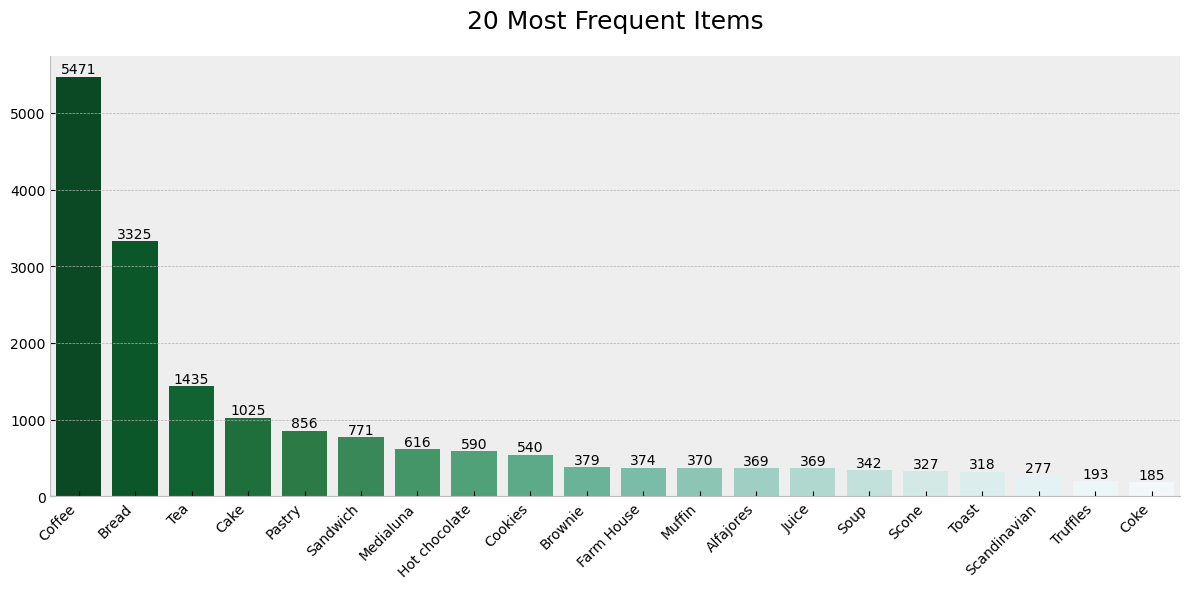

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

item_df = itemFrequency.head(20).reset_index()
item_df.columns = ['Items', 'Frequency']

# 그래프 스타일 설정
plt.figure(figsize=(12, 6))
sns.barplot(data=item_df, x='Items', y='Frequency', palette='BuGn_r')

# 막대 위에 수치 표시
for index, row in item_df.iterrows():
    plt.text(index, row['Frequency'] + 5, row['Frequency'], ha='center', va='bottom')

# 제목, 축 스타일 조정
plt.title('20 Most Frequent Items', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.tight_layout()
plt.show()


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 판매량 기준으로 커피가 압도적인 1위! 그 뒤로로 식빵과 차가 있네요! <strong>
</span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 그럼 이제 연관 분석을 시작해봅시다!! <strong>
</span>

### 🔴 <span style="color:red"> <strong> 2. 연관 분석 - TransactionEncoder로 이진 행렬로 변환 <strong> </span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 연관 분석을 시작하려면 데이터가 이진 행렬로 구성되어 있어야 한다는 거 기억나지?! 근데 데이터를 이진 행렬로 변환하려면 일단 데이터 리스트화와 nan값 제거가 선행되어야 합니다! <strong>
</span>

In [143]:
transactions=[]
for item in bakery['TransactionNo'].unique():
    lst=list(set(bakery[bakery['TransactionNo']==item]['Items']))
    transactions.append(lst)

transactions[0:10]

[['Bread'],
 ['Scandinavian'],
 ['Jam', 'Cookies', 'Hot chocolate'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Pastry', 'Muffin', 'Medialuna'],
 ['Coffee', 'Tea', 'Pastry', 'Medialuna'],
 ['Pastry', 'Bread'],
 ['Muffin', 'Bread'],
 ['Scandinavian', 'Medialuna']]

In [144]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
encodedData = te.fit(transactions).transform(transactions) # 학습과 변환을 따로따로!
data = pd.DataFrame(encodedData, columns=te.columns_)
data.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 이제 연관 분석을 위한 준비 완료! <strong>
</span>

### 🔴 <span style="color:red"> <strong> 3. 연관 분석 - Apriori 알고리즘 활용 <strong> </span>

- Apriori 알고리즘으로 빈발 항목 집합 도출 (지지도 2% 이상)

In [145]:
from mlxtend.frequent_patterns import apriori

# use_colnames=True: 결과의 itemsets 컬럼에 실제 항목 이름을 표시
frequentItems= apriori(data, use_colnames=True, min_support=0.02)

# 상위 5개 빈발 항목 집합 출력 (지지도 기준)
frequentItems.head()

,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)


- `association_rules`로 연관 규칙 도출 및 유의미한 규칙 필터링(신뢰도 5% 이상&향상도 1 이상)

In [146]:
from mlxtend.frequent_patterns import association_rules

# 연관 규칙 생성
# frequentItems: apriori 결과 (빈발 항목 집합)
# min_threshold=1: 향상도 1 이상인 규칙만 추출 (양의 연관성)
rules = association_rules(frequentItems, metric="lift", min_threshold=1)

# confidence(신뢰도) 5% 이상인 규칙만 필터링 → 의미 없는 낮은 신뢰도 규칙 제거
rules = rules[rules['confidence'] >= 0.05]

# antecedents(선행 항목), consequents(결과 항목)는 frozenset 형태이므로, 안의 값을 꺼내서 문자열로 변환
# 예: frozenset({'Coffee'}) → 'Coffee'
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))

rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,Pastry,Bread,0.086107,0.327205,0.029160,0.338650,1.034977,1.0,0.000985,1.017305,0.036980,0.075908,0.017011,0.213884
1,Bread,Pastry,0.327205,0.086107,0.029160,0.089119,1.034977,1.0,0.000985,1.003306,0.050231,0.075908,0.003296,0.213884
2,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,1.0,0.005044,1.011905,0.176684,0.103745,0.011765,0.320679
3,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
4,Tea,Cake,0.142631,0.103856,0.023772,0.166667,1.604781,1.0,0.008959,1.075372,0.439556,0.106736,0.070090,0.197779
5,Cake,Tea,0.103856,0.142631,0.023772,0.228891,1.604781,1.0,0.008959,1.111865,0.420538,0.106736,0.100611,0.197779
6,Coffee,Cookies,0.478394,0.054411,0.028209,0.058966,1.083723,1.0,0.002179,1.004841,0.148110,0.055905,0.004818,0.288707
7,Cookies,Coffee,0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707
8,Coffee,Hot chocolate,0.478394,0.058320,0.029583,0.061837,1.060311,1.0,0.001683,1.003749,0.109048,0.058333,0.003735,0.284542
9,Hot chocolate,Coffee,0.058320,0.478394,0.029583,0.507246,1.060311,1.0,0.001683,1.058553,0.060403,0.058333,0.055314,0.284542


- 네트워크 시각화

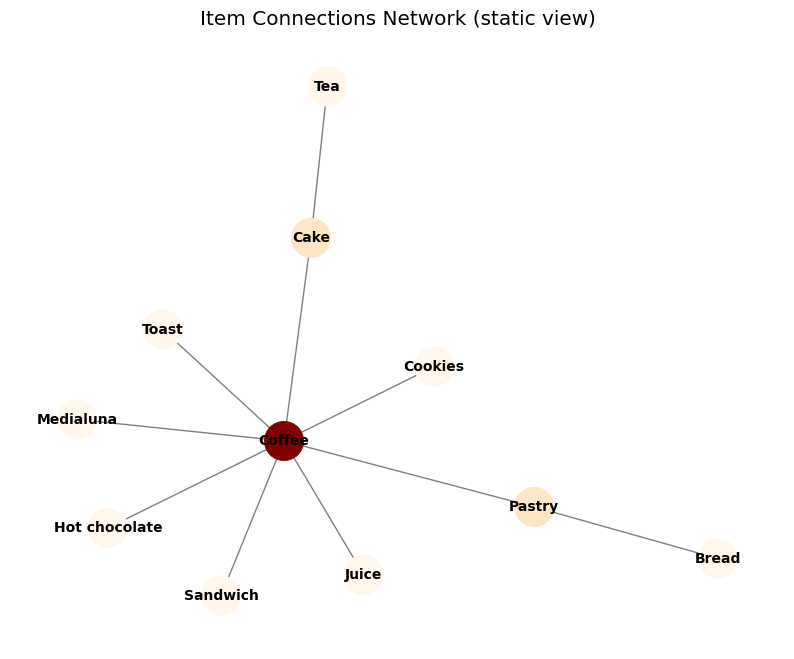

In [147]:
import matplotlib.pyplot as plt
import networkx as nx

# 그래프 생성
G = nx.Graph()

# 노드 추가
G.add_nodes_from(set(rules['antecedents']).union(set(rules['consequents'])))

# 엣지 추가
for i, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'])

# 레이아웃 설정
pos = nx.spring_layout(G, k=0.5, iterations=50)

# 노드 색상: 연결 수 (degree)
node_color = [len(list(G.neighbors(n))) for n in G.nodes()]

# 시각화
plt.figure(figsize=(10, 8))
nx.draw_networkx(
    G, pos,
    with_labels=True,
    node_size=800,
    node_color=node_color,
    cmap=plt.cm.OrRd,
    font_size=10,
    font_weight='bold',
    edge_color='gray'
)
plt.title("Item Connections Network (static view)")
plt.axis('off')
plt.show()


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 우린 커피 구매 고객 중심의 크로스셀링 전략을 수립할거니까! 커피를 산다는 게 전제 조건으로 와야겠죠?! <strong>
</span>

- antecedents가 "Coffee"인 규칙 추출

In [148]:
# 선행 항목(조건)이 'Coffee'인 규칙만 추출 → 커피를 산 고객 중심 분석
refinedRules = rules[rules['antecedents'] == 'Coffee'].copy()

# 향상도(lift) 기준으로 내림차순 정렬
refinedRules = refinedRules.sort_values('lift', ascending=False)

# 분석에 필요 없는 컬럼 제거
refinedRules.drop(['leverage', 'conviction'], axis=1, inplace=True)

refinedRules = refinedRules.reset_index(drop=True)
refinedRules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,zhangs_metric,jaccard,certainty,kulczynski
0,Coffee,Medialuna,0.478394,0.061807,0.035182,0.073542,1.189878,1.0,0.305936,0.069665,0.012509,0.321387
1,Coffee,Pastry,0.478394,0.086107,0.047544,0.099382,1.154168,1.0,0.256084,0.091968,0.014526,0.325764
2,Coffee,Sandwich,0.478394,0.071844,0.038246,0.079947,1.112792,1.0,0.194321,0.074701,0.008731,0.306150
3,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,1.0,0.176684,0.103745,0.011765,0.320679
4,Coffee,Cookies,0.478394,0.054411,0.028209,0.058966,1.083723,1.0,0.148110,0.055905,0.004818,0.288707
5,Coffee,Hot chocolate,0.478394,0.058320,0.029583,0.061837,1.060311,1.0,0.109048,0.058333,0.003735,0.284542


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 같은 분석을 FP-Growth 알고리즘을 이용해서도 해봅시다! <strong>
</span>

### 🔴 <span style="color:red"> <strong> 4. 연관 분석 - FP-Growth 알고리즘 활용 <strong> </span>

- FP-Growth 알고리즘으로 빈발 항목 집합 도출 (지지도 2% 이상)

In [149]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# FP-Growth로 빈발 항목 집합 추출
frequentItems = fpgrowth(data, use_colnames=True, min_support=0.02)


- `association_rules`로 연관 규칙 도출 및 유의미한 규칙 필터링(신뢰도 5% 이상&향상도 1 이상)

In [150]:
# 연관 규칙 생성: lift가 1 이상인 규칙만 추출
rules = association_rules(frequentItems, metric="lift", min_threshold=1)

# 신뢰도 5% 이상 조건 추가 필터링
rules = rules[rules['confidence'] >= 0.05]


# 단일 항목으로 변환 (frozenset → str)
rules['antecedents'] = rules['antecedents'].apply(lambda x: next(iter(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: next(iter(x)))

rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,Coffee,Hot chocolate,0.478394,0.058320,0.029583,0.061837,1.060311,1.0,0.001683,1.003749,0.109048,0.058333,0.003735,0.284542
1,Hot chocolate,Coffee,0.058320,0.478394,0.029583,0.507246,1.060311,1.0,0.001683,1.058553,0.060403,0.058333,0.055314,0.284542
2,Coffee,Cookies,0.478394,0.054411,0.028209,0.058966,1.083723,1.0,0.002179,1.004841,0.148110,0.055905,0.004818,0.288707
3,Cookies,Coffee,0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707
4,Coffee,Pastry,0.478394,0.086107,0.047544,0.099382,1.154168,1.0,0.006351,1.014740,0.256084,0.091968,0.014526,0.325764


- 네트워크 시각화

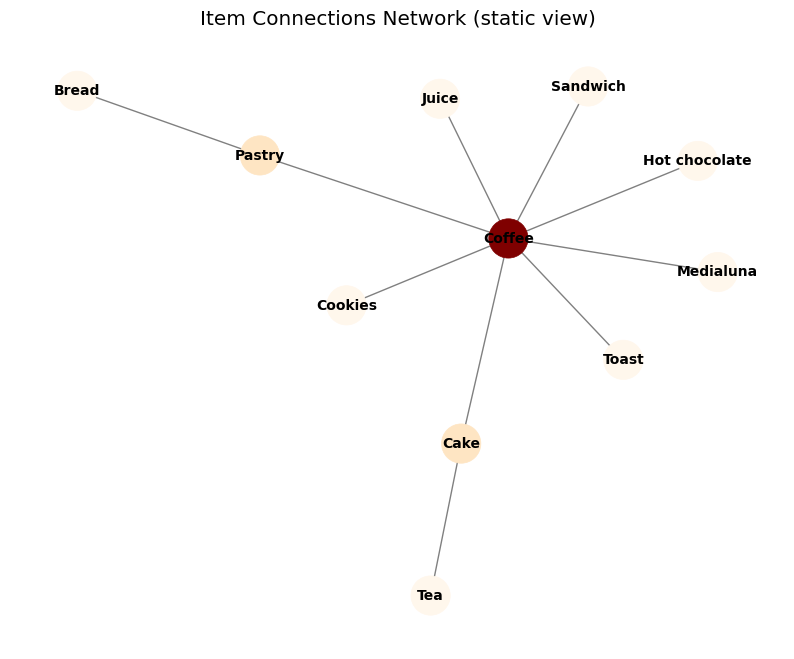

In [151]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from(set(rules['antecedents']).union(set(rules['consequents'])))

for _, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'])

pos = nx.spring_layout(G, k=0.5, iterations=50)
node_color = [len(list(G.neighbors(n))) for n in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw_networkx(
    G, pos,
    with_labels=True,
    node_size=800,
    node_color=node_color,
    cmap=plt.cm.OrRd,
    font_size=10,
    font_weight='bold',
    edge_color='gray'
)
plt.title("Item Connections Network (static view)")
plt.axis('off')
plt.show()


- antecedents가 "Coffee"인 규칙 추출

In [152]:
# 선행 항목이 'Coffee'인 규칙만 추출 → 커피를 먼저 산 고객 중심 분석
refinedRules = rules[rules['antecedents'] == 'Coffee'].copy()

# 향상도(lift) 기준으로 내림차순 정렬
refinedRules = refinedRules.sort_values('lift', ascending=False)

# 불필요한 열 제거
refinedRules.drop(['leverage', 'conviction'], axis=1, inplace=True)

refinedRules = refinedRules.reset_index(drop=True)
refinedRules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,zhangs_metric,jaccard,certainty,kulczynski
0,Coffee,Medialuna,0.478394,0.061807,0.035182,0.073542,1.189878,1.0,0.305936,0.069665,0.012509,0.321387
1,Coffee,Pastry,0.478394,0.086107,0.047544,0.099382,1.154168,1.0,0.256084,0.091968,0.014526,0.325764
2,Coffee,Sandwich,0.478394,0.071844,0.038246,0.079947,1.112792,1.0,0.194321,0.074701,0.008731,0.306150
3,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,1.0,0.176684,0.103745,0.011765,0.320679
4,Coffee,Cookies,0.478394,0.054411,0.028209,0.058966,1.083723,1.0,0.148110,0.055905,0.004818,0.288707
5,Coffee,Hot chocolate,0.478394,0.058320,0.029583,0.061837,1.060311,1.0,0.109048,0.058333,0.003735,0.284542


<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 Apriori 알고리즘을 활용했을 때와 FP-Growth 알고리즘을 활용했을 때, 동일한 결과가 나오는 걸 확인할 수 있어요! <strong>
</span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 그럼 결과를 한 번 해석해볼까요!? <strong>
</span>

### 🔴 <span style="color:red"> <strong> 5. 연관 분석 결과 해석 <strong> </span>

In [153]:
refinedRules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,zhangs_metric,jaccard,certainty,kulczynski
0,Coffee,Medialuna,0.478394,0.061807,0.035182,0.073542,1.189878,1.0,0.305936,0.069665,0.012509,0.321387
1,Coffee,Pastry,0.478394,0.086107,0.047544,0.099382,1.154168,1.0,0.256084,0.091968,0.014526,0.325764
2,Coffee,Sandwich,0.478394,0.071844,0.038246,0.079947,1.112792,1.0,0.194321,0.074701,0.008731,0.306150
3,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,1.0,0.176684,0.103745,0.011765,0.320679
4,Coffee,Cookies,0.478394,0.054411,0.028209,0.058966,1.083723,1.0,0.148110,0.055905,0.004818,0.288707
5,Coffee,Hot chocolate,0.478394,0.058320,0.029583,0.061837,1.060311,1.0,0.109048,0.058333,0.003735,0.284542


- OOO에 단어를 채워주세요.

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 커피(Coffee)는 이 베이커리에서 가장 많이 판매되는 핵심 상품으로,
총 6개의 다른 품목(Medialuna, Pastry, Sandwich, Cake, Cookies, Hot chocolate	)과 양의 연관 관계(lift>1)를 보인다. <strong>
</span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 커피를 구매한 고객 중 약 11.4%는 케이크(Cake), 약 9.9%는 페이스트리(Pastry), 약 7.9%는 샌드위치(Sandwich)**를 함께 구매하며, 그 외에도 쿠키(Cookies), 핫초코(Hot chocolate), 메디알루나(Medialuna) 등이 자주 함께 구매된다. (confidence)<strong>
</span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 이 품목들은 각각의 일반 구매율보다 1.06~1.19배 더 자주 커피와 함께 구매된다. (lift) <strong>
</span>

### 🔴 <span style="color:red"> <strong> 6. 베이커리에서 커피 기반 교차 판매(Cross-Selling) 전략 수립 <strong> </span>

<span style="color:black; background-color:#E6E6FA; padding:2px 4px; border-radius:4px">
<strong> 🤓 커피를 중심으로 한 6개의 연관 상품과의 관계를 고려할 때, 이 베이커리가 아직 이를 적극적으로 활용하고 있지 않다면 다음과 같은 전략을 시도해볼 수 있다. <strong>
</span>


- 커피와 함께 자주 구매되는 케이크, 페이스트리, 샌드위치, 메디알루나 등에 대해
**묶음 할인, 조합형 세트 메뉴, 또는 시간대별 추천 세트(예: 브런치 세트)** 를 구성하면 고객의 교차 구매를 유도하고 객단가 상승 효과를 기대할 수 있다.


- 이 연관 상품들을 **커피 주문대나 픽업 동선 근처에 진열**하거나,
디지털 메뉴판·키오스크에서 커피 선택 시 자동 추천되도록 구성함으로써
구매 순간의 의사결정에 개입하는 **충동구매 유도 전략**이 효과적일 수 있다.

# **🤓 수고했습니다~**